In [52]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '300'})

#### Experiment #1 : RGB layer

In [53]:
model = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [54]:
model.layers[2].kernel_size

(7, 7)

In [55]:
f = model.layers[2].get_weights()

In [56]:
f[0].shape

(7, 7, 3, 64)

(7, 7, 3, 10)
(10, 7, 7, 3) (10, 7, 7, 3) (10, 7, 7, 3)


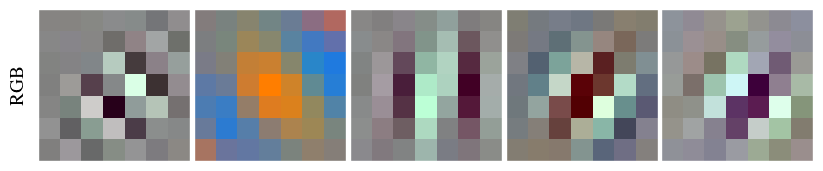

In [57]:

n_filters = 5

filters, _ = model.layers[2].get_weights()
plt.rcParams.update({'figure.dpi': '200'})

plt.rcParams["axes.facecolor"] = "E5E5E5"
plt.rcParams["axes.edgecolor"] = "white"
fig= plt.figure(figsize = (n_filters, 1))
fig.clf()


#fig.tight_layout()
gs1 = gridspec.GridSpec(1, n_filters)
gs1.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
ax = [fig.add_subplot(ss) for ss in gs1]
ax = np.reshape(ax, (1, n_filters))
#fig, ax = plt.subplots(gs1 , sharex=False, sharey=False)


top10F=topKfilters(model, 0, k=100, sev=True)[:10]
filters = get_filter(model, 0, sev=True)[:,:,:, top10F]
theta = getSobelTF(filters)
print(filters.shape)
_, a = getSymAntiSymTF(filters)
a_mag = reduce_euclidean_norm(a, axis=[0,1])

#dvec, dtheta = getDominantAngle(filters)

for i in range(n_filters):
	f = filters[:,:,:, i]
	f_norm  =  (f - f.min())/(f.max() - f.min()) 
	
	ax[0,i].imshow(f_norm)

	ax[0, i].set_xticks([])
	ax[0, i].set_yticks([])
	ax[0, i].set_aspect('equal')
ax[0,0].set_ylabel(f"RGB", fontsize=7) 

#fig.subplots_adjust(left=None, bottom=None, right=0.005, top=0.005)

plt.show()


In [58]:
fig.savefig('figures/resnet_rgb_5.pdf', dpi=600, rasterized=True)
plt.show()

c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error in 3.6
  """Entry point for launching an IPython kernel.
